In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score


import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c

In [11]:
class NaiveBayes():
    
    def fit(self, X, y):
        n_saples, n_features = X.shape
        self.classes = np.unique(y)
        numberOfClass = len(self.classes)
        
        
        #calculate mean, variance, prior = p(y) 
        self.mean_ = np.zeros((numberOfClass, n_features), dtype = np.float64)
        self.variance_ = np.zeros((numberOfClass, n_features), dtype = np.float64)
        self.priors = np.zeros(numberOfClass, dtype = np.float64)
        
        
        for index, c in enumerate(self.classes):
            X_c = X[y == c]
            self.mean_[index, :] = X_c.mean(axis = 0)
            self.variance_[index, :] = X_c.var(axis = 0)
            self.priors[index] = X_c.shape[0] / float(numberOfClass) # frequences (100 / 2)
            
            

    def predict(self, X):
        y_pred = [self.predict_(x) for x in X]
        return np.array(y_pred)
    
    def predict_(self, x):
        
        priors_list = []
        
        #y = argmax log(P(y)) + log(P(x1/y)) +...+ log(P(xn/y)) 
        for index, c in enumerate(self.classes):
            prior = np.log(self.priors[index]) # log(P(y))
            post = np.sum(np.log(self.conditional_probability(index, x))) # log(P(x1/y)) +...+ log(P(xn/y)) 
            post = prior + post
            
            priors_list.append(post)
            
            
        
        return self.classes[np.argmax(priors_list)] # y = argmax log(P(y)) + log(P(x1/y)) +...+ log(P(xn/y)) 
    
    
    def  conditional_probability(self, class_index, x):
        mean = self.mean_[class_index]
        var = self.variance_[class_index]
        pay = np.exp(-(x - mean)**2)
        payda = np.sqrt(2 * np.pi * var)
        
        return pay / payda
        
        
       

In [3]:
X, y = make_classification(n_samples=200, n_features=10, n_classes=2, random_state=42)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

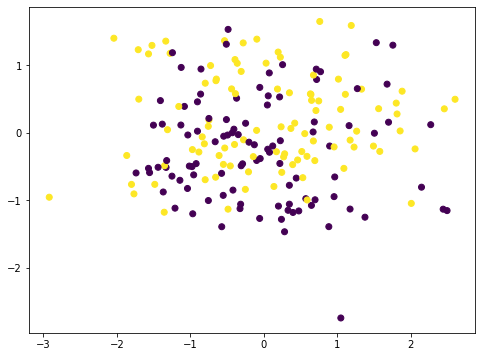

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:,1] , c  = y)
plt.show()

In [12]:
#train
model = NaiveBayes()

In [13]:
model.fit(X_train, y_train)

In [20]:
y_pred = model.predict(X_test)

In [21]:
acc = accuracy_score(y_test, y_pred)

In [25]:
print(f"Acc : %{acc * 100}")

Acc : %80.0
